# Housing Prices

The dataset variables are described as follows:

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

The goal is to predict whether the sales price of the house

## 1- Import Libraries

We first import a list of libraries we will be using

In [427]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

We would like to ignore the warnings from some packages

In [428]:
# Ignore warnings

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## 2- Load the Data

We load the house price data from csv files.

In [429]:
housePriceTrain = pd.read_csv('train.csv')
housePriceTest = pd.read_csv('test.csv')

# Make a copy of the training data for EDA purposes
housePriceEDA = housePriceTrain.copy()

## 3- EDA

Check to see what the dataset looks like

In [430]:
display(housePriceEDA.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### MSSubClass

Definition: The building class

Insights from below:
- Data is highly left skewed
- There may be some relationship between MSSubClass as Price. Specifically, the greater the MSSubClass the lower the price.
- Applying the function groupMSSubClass may enable a better representation by grouping observation into buckets so that each bucket has enough observations

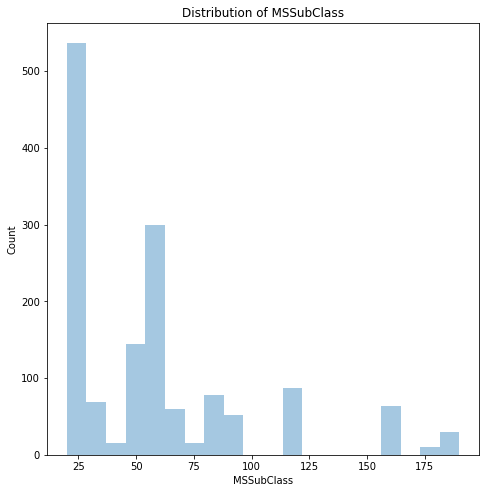

In [431]:
# Create the figure
fig = plt.figure(figsize=(6,6))

# Get the axes
axes = fig.add_axes([0.1,0.1,1,1])

# Plot
sns.distplot(a = housePriceEDA.MSSubClass, kde=False, ax=axes)

# Set the labels and title
axes.set_ylabel('Count')
axes.set_title('Distribution of MSSubClass')

plt.show()

Checking MSSubClass we see that smaller MSSubClasses have slightly higher mean house prices.

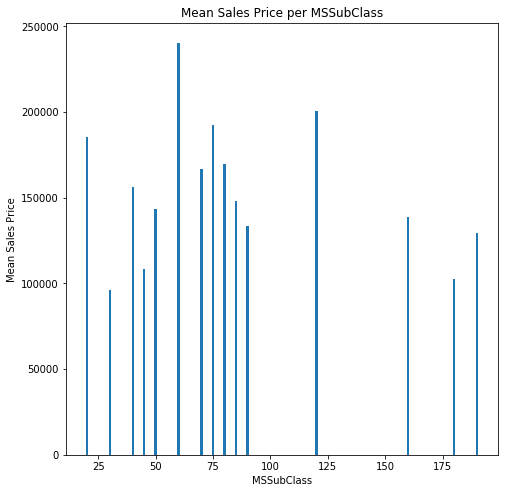

In [432]:
# Get the mean Sales Price per MSSubClass
meanHousePricePerMSSubClass = housePriceEDA[['SalePrice','MSSubClass']].groupby('MSSubClass').mean().reset_index()

# Create the figure object
fig = plt.figure(figsize=(6,6))

# Get the axes
axes = fig.add_axes([0.1,0.1,1,1])

# Set the labels and title
axes.set_xlabel('MSSubClass')
axes.set_ylabel('Mean Sales Price')
axes.set_title('Mean Sales Price per MSSubClass')

# Plot
axes.bar(x = meanHousePricePerMSSubClass.MSSubClass,height=meanHousePricePerMSSubClass.SalePrice,width=1)
plt.show()

Let's group the MSSubClasses in order to even up the distribution

In [433]:
def groupMSSubClass(x):
    if x < 50:
        return 'Class1'
    elif x < 100:
        return 'Class2'
    else:
        return 'Class3'

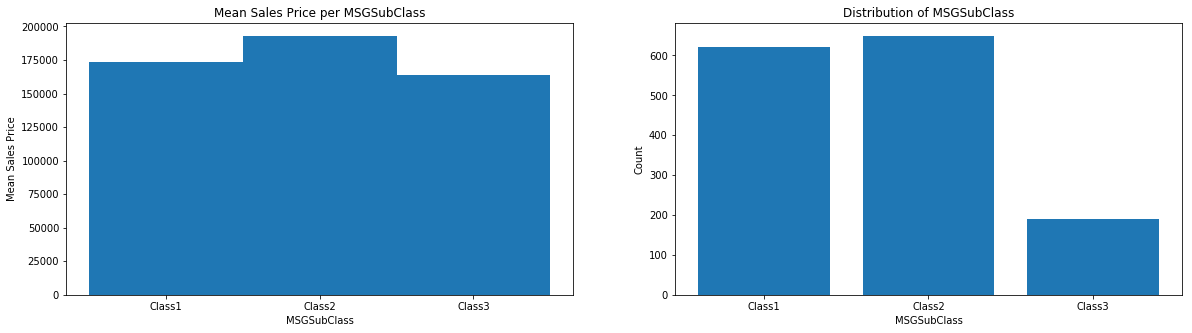

In [434]:
housePriceEDA['MSGSubClass'] = housePriceEDA['MSSubClass'].apply(groupMSSubClass)

# Get the mean Sales Price per MSClass
meanHousePricePerMSGClass = housePriceEDA[['SalePrice','MSGSubClass']].groupby('MSGSubClass').mean().reset_index()

# Create the figure object and get the axes
fig,axes = plt.subplots(ncols=2,)

fig.set_size_inches(20,5)

# Set the labels and title
axes[0].set_xlabel('MSGSubClass')
axes[0].set_ylabel('Mean Sales Price')
axes[0].set_title('Mean Sales Price per MSGSubClass')

axes[1].set_xlabel('MSGSubClass')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of MSGSubClass')

# Plot
axes[0].bar(x = meanHousePricePerMSGClass.MSGSubClass,height=meanHousePricePerMSGClass.SalePrice,width=1)
axes[1].bar(x = housePriceEDA['MSGSubClass'].value_counts().sort_index().reset_index().iloc[:,0],\
           height = housePriceEDA['MSGSubClass'].value_counts().sort_index().reset_index().iloc[:,1])
plt.show()


In [435]:
housePriceEDA.iloc[:,40:].head()

,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSGSubClass
0,Ex,Y,SBrkr,856,854,0,1710,1,0,2,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,Class2
1,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Class1
2,Ex,Y,SBrkr,920,866,0,1786,1,0,2,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,Class2
3,Gd,Y,SBrkr,961,756,0,1717,1,0,1,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Class2
4,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Class2


In [436]:
housePriceEDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

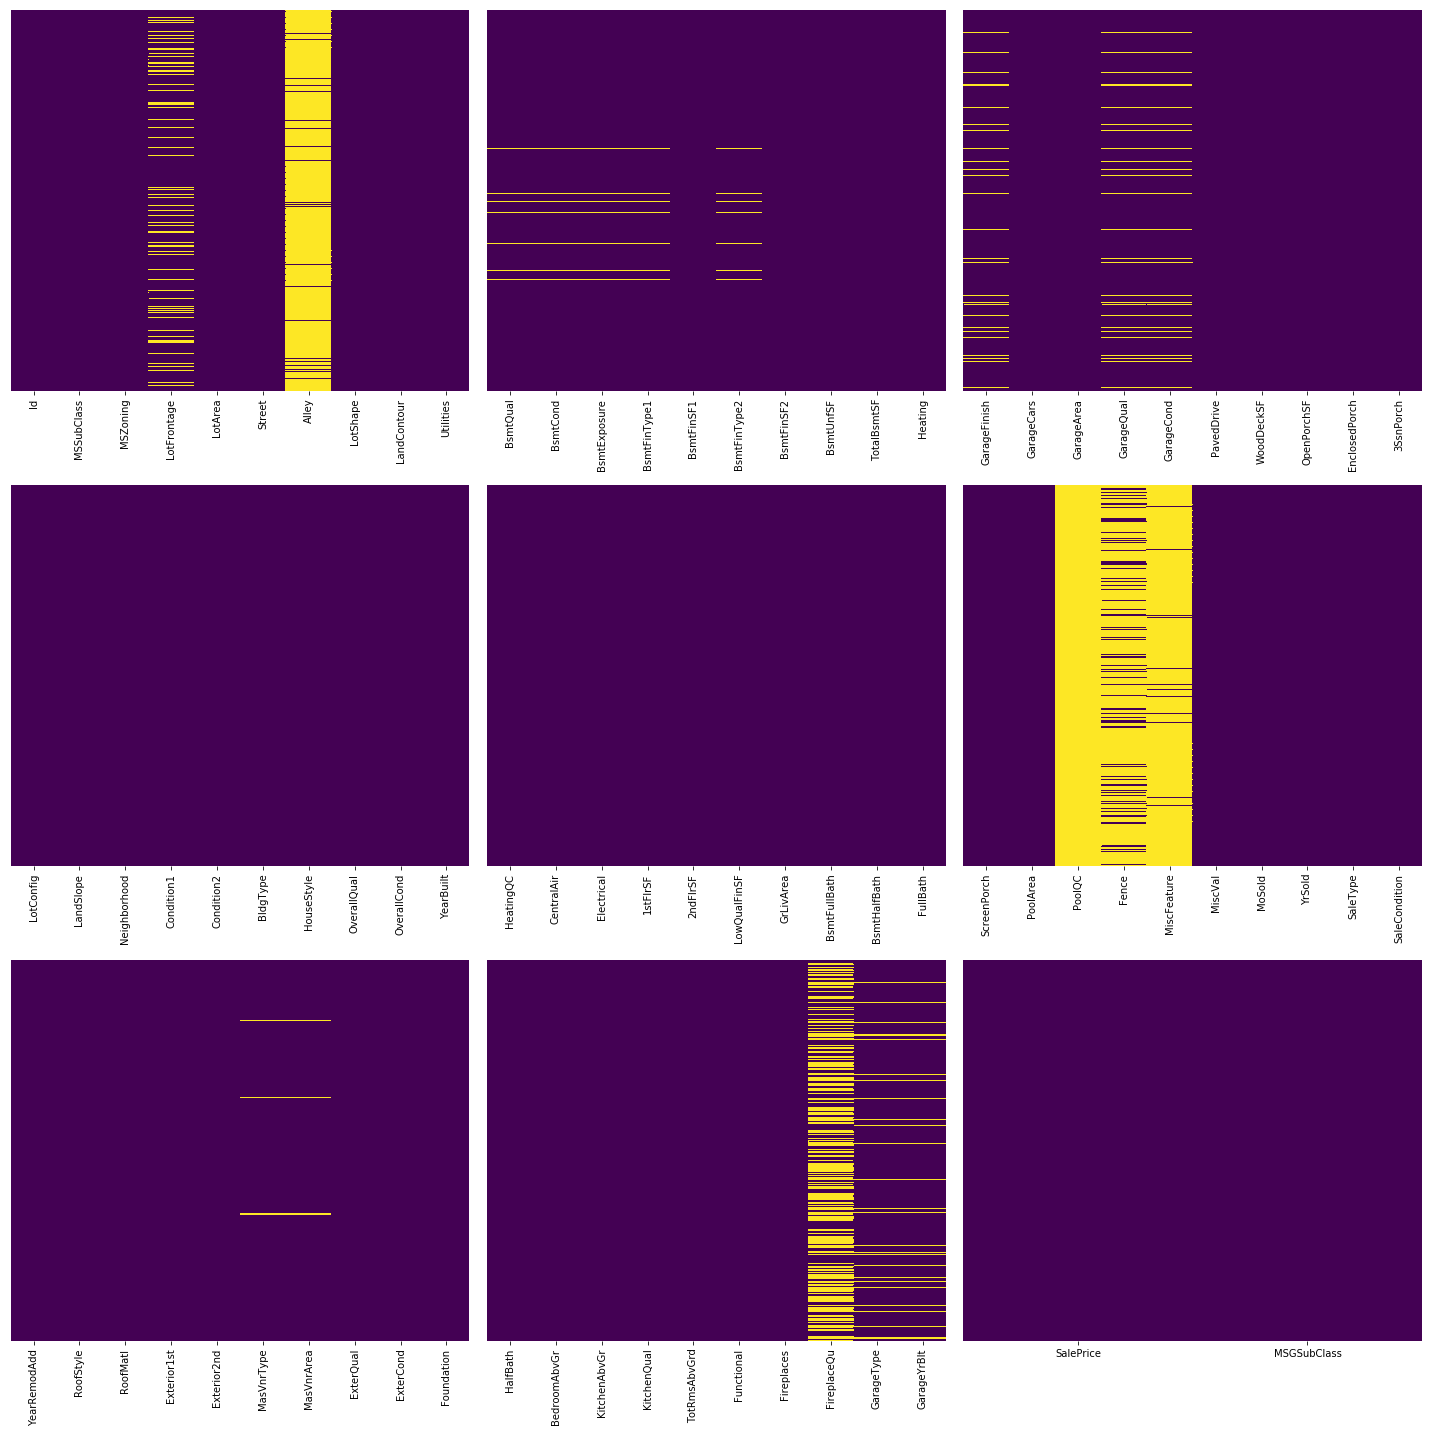

In [437]:
naxes = int(housePriceEDA.shape[1]/10 + 1)

naxes_x = int(np.sqrt(naxes))
naxes_y = naxes_x

fig,axes=plt.subplots(nrows = naxes_y, ncols=naxes_x)
fig.set_size_inches(20,20)

row = 0
col = 0

for i in range(naxes):
    row = i % naxes_y
    col = int((i - row)/naxes_y)
    if (col >= naxes_x) or (row >= naxes_y):
        continue
    sns.heatmap(data=housePriceEDA.iloc[:,i*10:i*10 + 10].isnull(),\
                yticklabels=False,cmap='viridis',cbar=False,ax=axes[row][col])


plt.tight_layout()

From the above we have the following:

Qualitative variables:
- MSSubClass
- MSZoning
- Street
- Alley
- LotShape
- LandContour
- Utilities
- LotConfig
- LandSlope
- Neighborhood
- Condition1
- Condition2
- BldgType
- HouseStyle
- RoofStyle
- RoofMatl
- Exterior1st
- Exterior2nd
- MasVnrType
- ExterQual
- ExterCond
- Foundation
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- Heating
- HeatingQC
- CentralAir
- Electrical
- KitchenQual
- Functional
- FireplaceQu
- GarageType
- GarageFinish
- GarageQual
- GarageCond
- PavedDrive
- PoolQC
- Fence
- MiscFeature
- SaleType
- SaleCondition

Quantitative Variables:
- LotFrontage
- LotArea
- OverallQual
- OverallCond
- YearBuilt
- YearRemodAdd
- MasVnrArea
- BsmtFinSF1
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- LowQualFinSF
- GrLivArea
- BsmtFullBath
- BsmtHalfBath
- FullBath
- HalfBath
- BedroomAbvGr
- KitchenAbvGr
- TotRmsAbvGrd
- Fireplaces
- GarageYrBlt
- GarageCars
- GarageArea
- WoodDeckSF
- OpenPorchSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal
- MoSold
- YrSold

Variables with null values:
- LotFrontage
- Alley
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- GarageFinish
- GarageQual
- GarageCond
- PoolQC
- Fence
- MiscFeature
- MasVnrType
- MasVnrArea
- FireplaceQu
- GarageType
- GarageYrBlt

In [438]:
dummy = pd.get_dummies(housePriceEDA['MSZoning'],drop_first=True)
newIndices = ['MSZoning' + col for col in dummy.columns]
dummy.columns = newIndices
dummy.head()

,MSZoningFV,MSZoningRH,MSZoningRL,MSZoningRM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


Null GarageYrBlt values

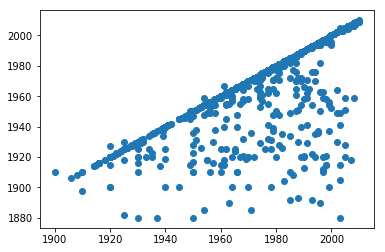

In [715]:
tempHousePriceEDA = housePriceEDA.dropna(subset=['GarageYrBlt']).reset_index().drop(columns=['index'])
plt.scatter(x=tempHousePriceEDA['GarageYrBlt'],y=tempHousePriceEDA['YearBuilt'])

#### Null LotFrontage values

A Null value for LotFrontage can just be replaced by the mean LotFrontage of all the houses. However, a more intuitive approach is the get the mean LotFrontage of similar houses instead. For example, if we were dealing with houses in London, it doesn't make that much sense to replace a house in Central London with the same LotFrontage mean as a house in South East London further away from the City. Below, we get the houses Building Type and Neighborhood and replace the Null LotFrontage by the mean of the houses with the same Building Type and Neighborhood. In cases where this Building Type and Neighborhood doesn't exist in the data set, we only look at the Neighborhood. In case this fails, we just return the mean of all houses.

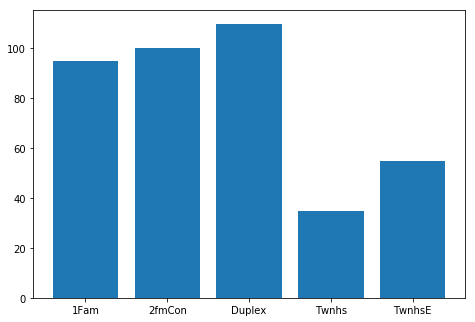

In [1050]:
tempHousePriceEDA = housePriceEDA.dropna(subset=['LotFrontage']).reset_index().drop(columns=['index'])
# Group by mssubclass
grp = tempHousePriceEDA[['LotFrontage','BldgType','Neighborhood']].groupby(by=['BldgType','Neighborhood']).apply(np.mean).reset_index()
grp2 = tempHousePriceEDA[['LotFrontage','Neighborhood']].groupby(by=['Neighborhood']).apply(np.mean).reset_index()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(grp['BldgType'],grp['LotFrontage'])

values = list(grp.iloc[:,2])
values.extend(grp2.iloc[:,1])
keys = list(grp.iloc[:,0]+grp.iloc[:,1])
keys.extend(grp2.iloc[:,0])
dic = dict(zip(keys,values))

def getLotFrontage(x):
    if np.isnan(x[0]):
        if x[1] and x[2] and dic.get(x[1]+x[2]):
            return dic.get(x[1]+x[2])
        elif x[2] and dic.get(x[2]):
            return dic.get(x[2])
        else:
            return np.mean(list(dic.values()))
    else:
        return x[0]

In [1051]:
'''
tempHousePriceEDA = housePriceEDA.dropna(subset=['LotFrontage']).reset_index().drop(columns=['index'])
# Group by mssubclass
grp = tempHousePriceEDA[['LotFrontage','Neighborhood']].groupby(by=['Neighborhood']).apply(np.mean).reset_index()

values = list(grp.iloc[:,1])
keys = list(grp.iloc[:,0])
dic = dict(zip(keys,values))

def getLotFrontage(x):
    if np.isnan(x[0]):
        if x[1] and dic.get(x[1]):
            return dic.get(x[1])
        else:
            return np.mean(list(dic.values()))
    else:
        return x[0]
'''

"\ntempHousePriceEDA = housePriceEDA.dropna(subset=['LotFrontage']).reset_index().drop(columns=['index'])\n# Group by mssubclass\ngrp = tempHousePriceEDA[['LotFrontage','Neighborhood']].groupby(by=['Neighborhood']).apply(np.mean).reset_index()\n\nvalues = list(grp.iloc[:,1])\nkeys = list(grp.iloc[:,0])\ndic = dict(zip(keys,values))\n\ndef getLotFrontage(x):\n    if np.isnan(x[0]):\n        if x[1] and dic.get(x[1]):\n            return dic.get(x[1])\n        else:\n            return np.mean(list(dic.values()))\n    else:\n        return x[0]\n"

In [1052]:
from sklearn.linear_model import LinearRegression
lfmodel = LinearRegression()
lfmodel.fit(X=tempHousePriceEDA['LotFrontage'].values.reshape(-1,1),y=tempHousePriceEDA['LotArea'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1053]:
# TASKS

# Remove the ID column
# Create dummy variables for MSSubClass

qualVariables = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities',\
    'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',\
    'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',\
    'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure',\
    'BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical',\
    'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual',\
    'GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition','MSGSubClass']

def cleanAndTransform(x,original_df,qualVariables,trained_df = []):
    print('Cleaning and Transforming!!\n')
    df = x.copy()
    
    # Form groups of MSSubClass using the groupMSSubClass function
    df['MSGSubClass'] = df['MSSubClass'].apply(groupMSSubClass)
    
    print('Replacing null values for GarageYrBlt with YearBuilt')
    df['GarageYrBlt'] = df[['GarageYrBlt','YearBuilt']].\
    apply(lambda x: x[1] if np.isnan(x[0]) else x[0],axis=1)
    
    print('Replacing null values for LotFrontage')
    df['LotFrontage'] = df[['LotFrontage','BldgType','Neighborhood']].\
    apply(lambda x: getLotFrontage(x),axis=1)
    
    '''
    print('Replacing null values for LotFrontage')
    df['LotFrontage'] = df[['LotFrontage','Neighborhood']].\
    apply(lambda x: getLotFrontage(x),axis=1)
    '''
    
    print('\nThese Quantitative values have their nulls replaced by mean:')
    # For each quantitative variable, fill the null values with the average for that variable
    for col in x.columns:
        if col not in qualVariables:
            print(col+'\n' if sum(pd.isna(df[col])) > 0 else '',end='')
            df[col] = df[col].apply(lambda x: original_df[col].mean() if np.isnan(x) else x)
    
    print('\nThese Qualitative values have nulls appended with column name + NA:')
    # Take care of null values generically
    for col in qualVariables:
        print(col+'\n' if sum(pd.isna(df[col])) > 0 else '',end='')
        df[col] = df[col].apply(lambda x: str(x))
        df[col] = df[col].apply(lambda x: col+'NA' if pd.isnull(x) else str(x))
        df[col] = df[col].apply(lambda x: col+'NA' if pd.isna(x) else str(x))
        
    print('\nThe following columns have dummy variables created:')
    # For each qualitative variable, create dummy variables
    dummyVariables = []
    for col in qualVariables:
        if col not in ['RoofMatl','PoolQC','MiscFeature']:
            print(col)
            dummy = pd.get_dummies(df[col],drop_first=True)
            newIndices = [col + str(dummyCol) for dummyCol in dummy.columns]
            dummy.columns = newIndices
            dummyVariables.append(dummy)
    
    # Create dummy variables for all qualitative variables
    for dummy in dummyVariables:
        df = pd.concat([df,dummy],axis=1)
    
    # Drop columns
    df.drop(qualVariables,axis=1,inplace=True)
    
    # If the model has trained on a previous df, make sure the same dummy variables exist
    #df.apply(lambda x: [0 if pd.isna(i) else i for i in x])
    df_shape = df.iloc[:,0].shape
    if len(trained_df) > 0:
        print('\nAdding the following columns due to test train mismatch:')
        for colname in trained_df.columns:
            if colname not in df.columns:
                print(colname)
                df[colname] = pd.DataFrame(np.zeros(df_shape),columns=[colname])
    
    return df

In [1054]:
housePriceModel = cleanAndTransform(housePriceTrain,housePriceTrain,qualVariables)
housePriceModel.head(10)

Cleaning and Transforming!!

Replacing null values for GarageYrBlt with YearBuilt
Replacing null values for LotFrontage

These Quantitative values have their nulls replaced by mean:
MasVnrArea

These Qualitative values have nulls appended with column name + NA:
Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature

The following columns have dummy variables created:
MSSubClass
MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
SaleType
SaleCondition
MSGSubClass


,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleTypeNew,SaleTypeOth,SaleTypeWD,SaleConditionAdjLand,SaleConditionAlloca,SaleConditionFamily,SaleConditionNormal,SaleConditionPartial,MSGSubClassClass2,MSGSubClassClass3
0,1,65.000000,8450,7,5,2003,2003,196.0,706,0,...,0,0,1,0,0,0,1,0,1,0
1,2,80.000000,9600,6,8,1976,1976,0.0,978,0,...,0,0,1,0,0,0,1,0,0,0
2,3,68.000000,11250,7,5,2001,2002,162.0,486,0,...,0,0,1,0,0,0,1,0,1,0
3,4,60.000000,9550,7,5,1915,1970,0.0,216,0,...,0,0,1,0,0,0,0,0,1,0
4,5,84.000000,14260,8,5,2000,2000,350.0,655,0,...,0,0,1,0,0,0,1,0,1,0
5,6,85.000000,14115,5,5,1993,1995,0.0,732,0,...,0,0,1,0,0,0,1,0,1,0
6,7,75.000000,10084,8,5,2004,2005,186.0,1369,0,...,0,0,1,0,0,0,1,0,0,0
7,8,81.159091,10382,7,6,1973,1973,240.0,859,32,...,0,0,1,0,0,0,1,0,1,0
8,9,51.000000,6120,7,5,1931,1950,0.0,0,0,...,0,0,1,0,0,0,0,0,1,0
9,10,50.000000,7420,5,6,1939,1950,0.0,851,0,...,0,0,1,0,0,0,1,0,0,1


## Models

### Linear Regression

We will use forward selection to apply feature selection in order to form a parsimonious model. At each stage of the forward selection, we will use the $R^2$ metric in order to select the parameter and the adjusted $R^2$ metric to select the models.

In [1055]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm

#### A Single Predictor (LotFrontage)

In [1056]:
# First set X to be the full set of remaining parameters. Here we only select the LotFrontage
# Note that .iloc copies data
X = housePriceModel.iloc[:,1]

# y is the response variable
y = housePriceModel['SalePrice']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# For each variable, we create the model and check the R^2 metric


In [1057]:
# Let's check a few of the rows
X.head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [1058]:
# Add a Constant
X_new = sm.add_constant(np.asarray(X))

# Fit the linear regression model
linreg = sm.OLS(y, X_new)
linreg = linreg.fit()

# Get a summary
print(linreg.summary())
linreg.rsquared_adj

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     199.6
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           1.45e-42
Time:                        11:38:38   Log-Likelihood:                -18450.
No. Observations:                1460   AIC:                         3.690e+04
Df Residuals:                    1458   BIC:                         3.692e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        9.54e+04   6359.933     15.001      0.0

0.11979874691174819

#### Variable Selection

Next we do the following:
- Let 'fullParamList' contain all predictors
- Start with an empty model with no predictors
- Loop len(fullParamList) number of times (this is an outer loop)
- At each loop step, select the predictor in 'fullParamList' which results in the greatest R^2 value (this is an inner loop)
- Take note at each outer loop step which parameter was chosen

Note that at each outer loop step, the length of the model will increase by 1 as we choose the next best predictor to add to the model

In [1059]:
# Full parameter list without the response and the Id columns
fullParamList = [colname for colname in housePriceModel.columns]
fullParamList = list(filter(lambda x: x not in ['Id','SalePrice'],fullParamList))

# y is the response variable
y = housePriceModel['SalePrice']

# For each variable, we create the model and check the R^2 metric
paramOrder = []
chosenVariables = []
variablesLeft = len(fullParamList)+1

# OUTER LOOP
while (len(fullParamList) > 0) and (variablesLeft != len(fullParamList)):
    variablesLeft = len(fullParamList)
    bestR2 = 0
    bestParam = ''
    
    # INNER LOOP
    for param in fullParamList:
        thisModelParams = chosenVariables.copy()
        thisModelParams.append(param)
        X = housePriceModel.loc[:,thisModelParams]

        # Add a Constant
        X_new = sm.add_constant(np.asarray(X))

        # Fit the linear regression model
        linreg = sm.OLS(y, X_new)
        linreg = linreg.fit()

        # If the adjusted R^2 is better than our best, save it
        if bestR2 < linreg.rsquared:
            bestR2 = linreg.rsquared
            bestParam = param

    # Save the best param as a tuple with its R^2
    paramOrder.append((bestR2,bestParam))

    # Add the best parameter to the model for good
    chosenVariables.append(bestParam)

    # Remove this parameter from the list
    fullParamList = list(filter(lambda x: x != bestParam,fullParamList))
    
    print('Chose {} with R^2 = {}, {} parameters left'.format(bestParam,bestR2,len(fullParamList)))

Chose OverallQual with R^2 = 0.625651892462118, 261 parameters left
Chose GrLivArea with R^2 = 0.7141732234458849, 260 parameters left
Chose BsmtFinSF1 with R^2 = 0.7459489724668781, 259 parameters left
Chose GarageCars with R^2 = 0.7661904261435479, 258 parameters left
Chose NeighborhoodNridgHt with R^2 = 0.7790069226156732, 257 parameters left
Chose MSSubClass20 with R^2 = 0.7886748612306798, 256 parameters left
Chose BsmtExposureGd with R^2 = 0.7971994760285156, 255 parameters left
Chose NeighborhoodNoRidge with R^2 = 0.8057088612190566, 254 parameters left
Chose NeighborhoodStoneBr with R^2 = 0.8134224420969242, 253 parameters left
Chose SaleTypeNew with R^2 = 0.8198206836410878, 252 parameters left
Chose Condition2PosN with R^2 = 0.8264388874450996, 251 parameters left
Chose YearRemodAdd with R^2 = 0.8306209608408459, 250 parameters left
Chose MSGSubClassClass3 with R^2 = 0.8344811656408385, 249 parameters left
Chose NeighborhoodCrawfor with R^2 = 0.8378927699524004, 248 parameter

Chose NeighborhoodBrDale with R^2 = 0.9022077659679107, 145 parameters left
Chose NeighborhoodNPkVill with R^2 = 0.9022865905732264, 144 parameters left
Chose BldgTypeTwnhs with R^2 = 0.9023609379042328, 143 parameters left
Chose EnclosedPorch with R^2 = 0.9024291543996921, 142 parameters left
Chose RoofStyleGable with R^2 = 0.9024999264564706, 141 parameters left
Chose SaleTypeConLI with R^2 = 0.902568170762674, 140 parameters left
Chose BldgTypeTwnhsE with R^2 = 0.9026356203694773, 139 parameters left
Chose FunctionalMin2 with R^2 = 0.9027148962106816, 138 parameters left
Chose Exterior1stMetalSd with R^2 = 0.902783869656531, 137 parameters left
Chose MSZoningRM with R^2 = 0.9028433801098962, 136 parameters left
Chose MSZoningRH with R^2 = 0.9030962997492356, 135 parameters left
Chose NeighborhoodOldTown with R^2 = 0.9031573789699961, 134 parameters left
Chose Condition1PosA with R^2 = 0.903215009472611, 133 parameters left
Chose GarageCondFa with R^2 = 0.9032737727145663, 132 parame

Chose Condition2RRAn with R^2 = 0.9067322095535053, 30 parameters left
Chose Condition2RRNn with R^2 = 0.9067341319543027, 29 parameters left
Chose ExterCondGd with R^2 = 0.9067353075675472, 28 parameters left
Chose BsmtFinType2GLQ with R^2 = 0.9067362488045014, 27 parameters left
Chose BsmtFinType1Rec with R^2 = 0.90673680973495, 26 parameters left
Chose ExterCondPo with R^2 = 0.9067373465189495, 25 parameters left
Chose SaleTypeWD with R^2 = 0.9067378057034552, 24 parameters left
Chose BsmtCondGd with R^2 = 0.90673826747751, 23 parameters left
Chose PavedDriveY with R^2 = 0.906738630498473, 22 parameters left
Chose MSSubClass80 with R^2 = 0.9067389446852085, 21 parameters left
Chose PavedDriveP with R^2 = 0.9067392837171452, 20 parameters left
Chose GarageArea with R^2 = 0.9067394570605417, 19 parameters left
Chose Electricalnan with R^2 = 0.906739622021899, 18 parameters left
Chose HeatingGrav with R^2 = 0.9067397716944101, 17 parameters left
Chose HeatingGasA with R^2 = 0.906739962

In the above code, 'paramOrder' stored the order in which the parameters were added to the model - from the greatest contribution to the R^2 at each step. Below, we can see the top 10 parameters and their R^2 value once they were added.

In [1060]:
paramOrder[:10]

[(0.625651892462118, 'OverallQual'),
 (0.7141732234458849, 'GrLivArea'),
 (0.7459489724668781, 'BsmtFinSF1'),
 (0.7661904261435479, 'GarageCars'),
 (0.7790069226156732, 'NeighborhoodNridgHt'),
 (0.7886748612306798, 'MSSubClass20'),
 (0.7971994760285156, 'BsmtExposureGd'),
 (0.8057088612190566, 'NeighborhoodNoRidge'),
 (0.8134224420969242, 'NeighborhoodStoneBr'),
 (0.8198206836410878, 'SaleTypeNew')]

This translates to: OverallQual provided the best R^2 value out of all the predictors. GrLivArea provided the best R^2 value out of all the remaining predictors when included along with OverallQual, BsmtFinSF1 provided the best R^2 values out of all the remaining predictors when included along with OverallQual and GrLivArea and so on...

So in order of increasing R^2, we have the following models by looking at paramOrder:
- OverallQual
- OverallQual,GrLivArea
- OverallQual,GrLivArea,BsmtFinSF1
- OverallQual,GrLivArea,BsmtFinSF1,GarageCars
- OverallQual,GrLivArea,BsmtFinSF1,GarageCars,NeighborhoodNridgHt
.
.
.
And so on.

At this point we have 2 ways of deciding which model to choose:
1- Which one has the best Adjusted R^2
2- Which one has the best R^2 (or MSE) using Cross Validation

Adjusted R^2 is meant to estimate the test set error and is useful if computational resources are low. Let's start with 1:

#### Adjusted R^2 (model selection)

In [1001]:
# paramOrder now contains the parameters in the order of maximum R^2
# next we test each model and get the max adjusted R^2

# paramOrder is a tuple at each index. We only need the name
allParametersInOrder = [param for index,param in paramOrder]

thisModel = []

chosenVariables = []
variablesLeft = len(fullParamList)+1


bestAdjR2 = 0
bestModelArray = []

# Incrementally increase the model using paramOrder and calculate adjusted R^2 for each - choose the one with the best adj R^2
for param in allParametersInOrder:
    thisModel.append(param)
    X = housePriceModel.loc[:,thisModel]

    # Add a Constant
    X_new = sm.add_constant(np.asarray(X))

    # Fit the linear regression model
    linreg = sm.OLS(y, X_new)
    linreg = linreg.fit()

    # If the adjusted R^2 is better than our best, save it
    if bestAdjR2 < linreg.rsquared_adj:
        bestAdjR2 = linreg.rsquared_adj
        bestModelArray = thisModel.copy()   

    print('Model size is {}, adj R^2 is {}'.format(len(thisModel),linreg.rsquared_adj))
        
    
        

Model size is 1, adj R^2 is 0.6253951379301991
Model size is 2, adj R^2 is 0.7137808737182882
Model size is 3, adj R^2 is 0.7454255156793785
Model size is 4, adj R^2 is 0.7655476506827742
Model size is 5, adj R^2 is 0.778246973931408
Model size is 6, adj R^2 is 0.787802217849664
Model size is 7, adj R^2 is 0.7962217875520691
Model size is 8, adj R^2 is 0.8046376488756743
Model size is 9, adj R^2 is 0.8122643744961464
Model size is 10, adj R^2 is 0.8185772100982383
Model size is 11, adj R^2 is 0.825120398330387
Model size is 12, adj R^2 is 0.829216297074495
Model size is 13, adj R^2 is 0.832993098665272
Model size is 14, adj R^2 is 0.8363221808723544
Model size is 15, adj R^2 is 0.8386638087483226
Model size is 16, adj R^2 is 0.8422262462151828
Model size is 17, adj R^2 is 0.8446280704320286
Model size is 18, adj R^2 is 0.8468123861381511
Model size is 19, adj R^2 is 0.8491370745191886
Model size is 20, adj R^2 is 0.8512514395293433
Model size is 21, adj R^2 is 0.8533850238314737
Model 

Model size is 171, adj R^2 is 0.8931237710811306
Model size is 172, adj R^2 is 0.8930723889527304
Model size is 173, adj R^2 is 0.8930141826753464
Model size is 174, adj R^2 is 0.8929523002361184
Model size is 175, adj R^2 is 0.8930544168587126
Model size is 176, adj R^2 is 0.8929903561182901
Model size is 177, adj R^2 is 0.8929274704084713
Model size is 178, adj R^2 is 0.8928626177908003
Model size is 179, adj R^2 is 0.8927990622298708
Model size is 180, adj R^2 is 0.892770919071743
Model size is 181, adj R^2 is 0.8927071073427022
Model size is 182, adj R^2 is 0.8926409867949349
Model size is 183, adj R^2 is 0.8925746855915573
Model size is 184, adj R^2 is 0.8925064558721728
Model size is 185, adj R^2 is 0.8924373696289153
Model size is 186, adj R^2 is 0.8923676662261171
Model size is 187, adj R^2 is 0.8922977213089534
Model size is 188, adj R^2 is 0.8922272900584888
Model size is 189, adj R^2 is 0.8921549853307618
Model size is 190, adj R^2 is 0.8920864746423762
Model size is 191, ad

In [1002]:
print('\n\nThe best model is {} \n\nIts adjusted R^2 is {}'.format(bestModelArray,bestAdjR2))



The best model is ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'GarageCars', 'NeighborhoodNridgHt', 'MSSubClass20', 'BsmtExposureGd', 'NeighborhoodNoRidge', 'NeighborhoodStoneBr', 'SaleTypeNew', 'Condition2PosN', 'YearRemodAdd', 'MSGSubClassClass3', 'NeighborhoodCrawfor', 'YearBuilt', 'OverallCond', 'LotArea', 'BedroomAbvGr', 'BsmtQualGd', 'LotShapeIR3', 'BsmtQualTA', 'BsmtQualnan', 'BsmtQualFa', 'Exterior1stBrkFace', 'NeighborhoodSomerst', 'BsmtExposureNo', 'ScreenPorch', 'FunctionalTyp', 'MSSubClass90', 'HouseStyle1Story', 'LotFrontage', 'Exterior1stCemntBd', 'BsmtFinType1Unf', 'BldgType2fmCon', 'Condition1Norm', 'NeighborhoodBrkSide', 'WoodDeckSF', 'KitchenQualGd', 'KitchenQualTA', 'KitchenQualFa', 'LotConfigCulDSac', 'SaleConditionNormal', 'BsmtFullBath', 'FullBath', 'Exterior2ndImStucc', 'MasVnrArea', 'MasVnrTypeNone', 'NeighborhoodMitchel', 'Exterior2ndStucco', 'GarageTypenan', 'HeatingOthW', 'NeighborhoodEdwards', 'Condition2PosA', 'FunctionalSev', 'Fireplaces', 'LandSlopeSev', 

In [1003]:
len(bestModelArray)

141

We now have the best model selected via adjusted R^2. Let's perform a quick train test split to see how it performs when trained on a train set and tested on a test set. These results here are discarded and are meant just for curiousity.

In [1004]:
# First set X to be the full set of remaining parameters
X = housePriceModel.loc[:,bestModelArray]

# y is the response variable
y = housePriceModel['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1005]:
predictions = lm.predict(X_test)

r2_score(y_test,predictions)

0.8676057938013705

#### Cross Validation (model selection)

In [1006]:
# Import cross validation
from sklearn.cross_validation import cross_val_score

Below we estimate the test set R^2 when we include all the predictors as an example of an application of Cross Validation

In [1007]:
# Run cross validation to estimate the test set error
linregCVScores = cross_val_score(LinearRegression(),X,y,scoring='r2',cv=10)

# Get the mean R^2
linregCVScores.mean()

0.8447736672051904

In [1008]:
len(X)

1460

Next we do the Cross Validation as above but for each of the models in allParametersInOrder and select the model with the best Cross Validation score

In [1009]:
# Run through each model in the correct order and run CV on it and save the best CV score

bestMeanCV = 0
bestMeanCVModel = []

# y is the response variable
y = housePriceModel['SalePrice']

for i in range(1,len(allParametersInOrder)):
    # First set X to be the full set of remaining parameters
    X = housePriceModel.loc[:,allParametersInOrder[0:i]]

    linregCVScores = cross_val_score(LinearRegression(),X,y,scoring='r2',cv=10)
    
    if bestMeanCV < linregCVScores.mean():
        bestMeanCV = linregCVScores.mean()
        bestMeanCVModel = bestModelArray[0:i]
        
print('The final best model is {} and its TEST R^2 is {}'.format(bestMeanCVModel,bestMeanCV))

The final best model is ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'GarageCars', 'NeighborhoodNridgHt', 'MSSubClass20', 'BsmtExposureGd', 'NeighborhoodNoRidge', 'NeighborhoodStoneBr', 'SaleTypeNew', 'Condition2PosN', 'YearRemodAdd', 'MSGSubClassClass3', 'NeighborhoodCrawfor', 'YearBuilt', 'OverallCond', 'LotArea', 'BedroomAbvGr', 'BsmtQualGd', 'LotShapeIR3', 'BsmtQualTA', 'BsmtQualnan', 'BsmtQualFa', 'Exterior1stBrkFace', 'NeighborhoodSomerst', 'BsmtExposureNo', 'ScreenPorch', 'FunctionalTyp', 'MSSubClass90', 'HouseStyle1Story', 'LotFrontage', 'Exterior1stCemntBd', 'BsmtFinType1Unf', 'BldgType2fmCon', 'Condition1Norm', 'NeighborhoodBrkSide', 'WoodDeckSF', 'KitchenQualGd', 'KitchenQualTA', 'KitchenQualFa', 'LotConfigCulDSac', 'SaleConditionNormal', 'BsmtFullBath', 'FullBath', 'Exterior2ndImStucc', 'MasVnrArea', 'MasVnrTypeNone', 'NeighborhoodMitchel', 'Exterior2ndStucco', 'GarageTypenan', 'HeatingOthW', 'NeighborhoodEdwards', 'Condition2PosA', 'FunctionalSev', 'Fireplaces', 'LandSlopeSe

The best performing model is now in bestMeanCVModel. The following shows that we have the best model by confirming its R^2

In [1010]:
X = housePriceModel.loc[:,bestMeanCVModel]
linregCVScores = cross_val_score(LinearRegression(),X,y,scoring='r2',cv=10)
linregCVScores.mean()

0.8516135565813141

Below we train the model on all the training data we have and produce predictions for the new data

In [1022]:
# Apply the same cleaning and transformations using the function above
housePriceModel = cleanAndTransform(housePriceTrain,housePriceTrain,qualVariables)

# Get the columns corresponding to the best model
X = housePriceModel.loc[:,bestMeanCVModel]

# Fit the model
lm = LinearRegression()
lm.fit(X,y)

# And apply it to the new data
X_test = pd.read_csv('test.csv')
X_test_cleaned = cleanAndTransform(X_test,housePriceTrain,qualVariables,housePriceModel)
predictions = lm.predict(X_test_cleaned.loc[:,bestMeanCVModel])


Cleaning and Transforming!!

Replacing null values for GarageYrBlt with YearBuilt
Replacing null values for LotFrontage

These Quantitative values have their nulls replaced by mean:
MasVnrArea

These Qualitative values have nulls appended with column name + NA:
Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature

The following columns have dummy variables created:
MSSubClass
MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
SaleType
SaleCondition
MSGSubClass
Cleaning and Transforming!!

Replacing null values for GarageYrBlt with 

TypeError: ("unsupported operand type(s) for +: 'float' and 'str'", 'occurred at index 790')

In [1023]:
# Check that the cleaning didn't remove data
print(len(X_test) == len(X_test_cleaned))

# Check that the model didn't remove data
print(len(predictions) == len(X_test))

True
True


Let's now save the predictions to a file along with the Id column and predicted sale price

In [1024]:
LinReg = pd.concat([pd.DataFrame(X_test['Id']),pd.DataFrame(predictions,columns=['SalePrice'])],axis=1)
LinReg.to_csv('LinearRegression_Predictions.csv',index=False)

In [625]:
from sklearn.model_selection import GridSearchCV

In [626]:
params = {'fit_intercept':[True,False],'normalize':[True,False]}

In [526]:
gscv = GridSearchCV(LinearRegression(),params,scoring='r2',cv=10)
gscv.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [527]:
gscv.best_score_

0.8513382421084185

In [528]:
lrm = cross_val_score(LinearRegression(normalize=True),X,y=y,scoring='r2',cv=10)

In [529]:
lrm = list(filter(lambda x: x> 0,lrm))

In [530]:
np.mean(lrm)

0.8518274086026226

In [531]:
lm2 = LinearRegression(normalize=True)
lm2.fit(X,y)
predictions2 = lm2.predict(X_test_cleaned.loc[:,bestMeanCVModel])

In [532]:
predictions2

array([113774.46688273, 150591.94992112, 176507.16526576, ...,
       147197.79506152, 103345.08991562, 223394.69723171])

In [533]:
predictions

array([113774.46688313, 150591.94992183, 176507.16526592, ...,
       147197.79506179, 103345.08991651, 223394.69723145])

In [534]:
LinReg2 = pd.concat([pd.DataFrame(X_test['Id']),pd.DataFrame(predictions2,columns=['SalePrice'])],axis=1)
LinReg2.to_csv('LinearRegression_Predictions2.csv',index=False)

In [535]:
gb = X_test[['Id','MSSubClass','LotFrontage','LotArea']].groupby(by=['Id']).\
agg({'MSSubClass':lambda x: sum(pd.isna(x)),'LotFrontage':lambda x: sum(pd.isna(x)),'LotArea':lambda x: sum(pd.isna(x))})

In [536]:
gb.head()

,MSSubClass,LotFrontage,LotArea
Id,,,
1461,0,0.0,0
1462,0,0.0,0
1463,0,0.0,0
1464,0,0.0,0
1465,0,0.0,0


In [537]:
X_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Lasso Regression

In [474]:
from sklearn.linear_model import Lasso

In [475]:
lassomodel = Lasso()
lassomodel.fit(X,y)
r2_score(lassomodel.predict(X),y)

0.8862783320679049

In [476]:
# Full parameter list without the response and the Id columns
fullParamList = [colname for colname in housePriceModel.columns]
fullParamList = list(filter(lambda x: x not in ['Id','SalePrice'],fullParamList))

# y is the response variable
y = housePriceModel['SalePrice']

# For each variable, we create the model and check the R^2 metric
paramOrder = []
chosenVariables = []
variablesLeft = len(fullParamList)+1

# OUTER LOOP
while (len(fullParamList) > 0) and (variablesLeft != len(fullParamList)):
    variablesLeft = len(fullParamList)
    bestR2 = 0
    bestParam = ''
    
    # INNER LOOP
    for param in fullParamList:
        thisModelParams = chosenVariables.copy()
        thisModelParams.append(param)
        X = housePriceModel.loc[:,thisModelParams]

        # Fit the linear regression model
        lassomodel = Lasso()
        lassomodel.fit(X,y)

        # If the adjusted R^2 is better than our best, save it
        r2 = r2_score(lassomodel.predict(X),y)
        if bestR2 < r2:
            bestR2 = r2
            bestParam = param

    # Save the best param as a tuple with its R^2
    paramOrder.append((bestR2,bestParam))

    # Add the best parameter to the model for good
    chosenVariables.append(bestParam)

    # Remove this parameter from the list
    fullParamList = list(filter(lambda x: x != bestParam,fullParamList))
    
    print('Chose {} with R^2 = {}, {} parameters left'.format(bestParam,bestR2,len(fullParamList)))

Chose OverallQual with R^2 = 0.40165332610279847, 259 parameters left
Chose GrLivArea with R^2 = 0.5997811241080735, 258 parameters left
Chose BsmtFinSF1 with R^2 = 0.6594213791894319, 257 parameters left
Chose GarageCars with R^2 = 0.6948357451343347, 256 parameters left
Chose NeighborhoodNridgHt with R^2 = 0.7163045453372476, 255 parameters left
Chose MSSubClass20 with R^2 = 0.7320395496993466, 254 parameters left
Chose BsmtExposureGd with R^2 = 0.7455959272814161, 253 parameters left
Chose NeighborhoodNoRidge with R^2 = 0.7588397572991169, 252 parameters left
Chose NeighborhoodStoneBr with R^2 = 0.7706046247196197, 251 parameters left
Chose SaleTypeNew with R^2 = 0.7801988228143695, 250 parameters left
Chose Condition2PosN with R^2 = 0.7899536942970818, 249 parameters left
Chose YearRemodAdd with R^2 = 0.7960478784426742, 248 parameters left
Chose NeighborhoodCrawfor with R^2 = 0.8010714068249227, 247 parameters left
Chose KitchenAbvGr with R^2 = 0.8053565326143245, 246 parameters l

Chose MSSubClass190 with R^2 = 0.8911364220459763, 143 parameters left
Chose GarageCondTA with R^2 = 0.8912516277984358, 142 parameters left
Chose FunctionalMin2 with R^2 = 0.8913544314978474, 141 parameters left
Chose EnclosedPorch with R^2 = 0.8914571196298481, 140 parameters left
Chose SaleTypeConLI with R^2 = 0.8915585472754523, 139 parameters left


KeyboardInterrupt: 

In [477]:
# Run through each model in the correct order and run CV on it and save the best CV score

bestMeanCV = 0
bestMeanCVModel = []

# y is the response variable
y = housePriceModel['SalePrice']

for i in range(1,len(allParametersInOrder)):
    # First set X to be the full set of remaining parameters
    X = housePriceModel.loc[:,allParametersInOrder[0:i]]

    lassoCVScores = cross_val_score(Lasso(),X,y,scoring='r2',cv=10)
    
    if bestMeanCV < lassoCVScores.mean():
        bestMeanCV = lassoCVScores.mean()
        bestMeanCVModel = bestModelArray[0:i]
        
print('The final best model is {} and its TEST R^2 is {}'.format(bestMeanCVModel,bestMeanCV))

The final best model is ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'GarageCars', 'NeighborhoodNridgHt', 'MSSubClass20', 'BsmtExposureGd', 'NeighborhoodNoRidge', 'NeighborhoodStoneBr', 'SaleTypeNew', 'Condition2PosN', 'YearRemodAdd', 'NeighborhoodCrawfor', 'KitchenAbvGr', 'MSSubClass160', 'YearBuilt', 'OverallCond', 'BsmtQualGd', 'BsmtQualTA', 'LotArea', 'LotShapeIR3', 'NeighborhoodSomerst', 'Exterior1stBrkFace', 'BsmtQualnan', 'BsmtQualFa', 'FunctionalTyp', 'MSSubClass30', 'BsmtExposureNo', 'Condition1Norm', 'ScreenPorch', 'WoodDeckSF', 'NeighborhoodBrkSide', 'BsmtFinType1GLQ', 'KitchenQualGd', 'KitchenQualTA', 'KitchenQualFa', 'LotConfigCulDSac', 'SaleConditionNormal', '2ndFlrSF', 'FullBath', 'BsmtFullBath', 'NeighborhoodEdwards', 'StreetPave', 'Fireplaces', 'GarageTypenan', 'NeighborhoodMitchel', 'Exterior2ndImStucc', 'Condition2PosA', 'MasVnrArea', 'MasVnrTypeNone', 'TotRmsAbvGrd', 'BedroomAbvGr', 'HouseStyle2Story', 'HeatingOthW', 'BsmtFinType1Unf', 'Exterior2ndStucco', 'MSSubClass

In [478]:
# Apply the same cleaning and transformations using the function above
housePriceModel = cleanAndTransform(housePriceTrain,housePriceTrain,qualVariables)

# Get the columns corresponding to the best model
X = housePriceModel.loc[:,bestMeanCVModel]

# Fit the model
lassom = Lasso()
lassom.fit(X,y)

# And apply it to the new data
X_test = pd.read_csv('test.csv')
X_test_cleaned = cleanAndTransform(X_test,housePriceTrain,qualVariables,housePriceModel)
predictions = lassom.predict(X_test_cleaned.loc[:,bestMeanCVModel])

Cleaning and Transforming!!


These Quantitative values have their nulls replaced by mean:
LotFrontage
MasVnrArea
GarageYrBlt

These Qualitative values have nulls appended with column name + NA:
Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature

The following columns have dummy variables created:
MSSubClass
MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
SaleType
SaleCondition
Cleaning and Transforming!!


These Quantitative values have their nulls replaced by mean:
LotFrontage
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
Total

In [479]:
# Check that the cleaning didn't remove data
print(len(X_test) == len(X_test_cleaned))

# Check that the model didn't remove data
print(len(predictions) == len(X_test))

True
True


In [480]:
LasReg = pd.concat([pd.DataFrame(X_test['Id']),pd.DataFrame(predictions,columns=['SalePrice'])],axis=1)
LasReg.to_csv('Lasso_Predictions.csv',index=False)

### Ridge Regression

In [481]:
from sklearn.linear_model import Ridge

In [482]:
ridgemodel = Ridge()
ridgemodel.fit(X,y)
r2_score(ridgemodel.predict(X),y)

0.8836746569635908

In [483]:
# Full parameter list without the response and the Id columns
fullParamList = [colname for colname in housePriceModel.columns]
fullParamList = list(filter(lambda x: x not in ['Id','SalePrice'],fullParamList))

# y is the response variable
y = housePriceModel['SalePrice']

# For each variable, we create the model and check the R^2 metric
paramOrder = []
chosenVariables = []
variablesLeft = len(fullParamList)+1

# OUTER LOOP
while (len(fullParamList) > 0) and (variablesLeft != len(fullParamList)):
    variablesLeft = len(fullParamList)
    bestR2 = 0
    bestParam = ''
    
    # INNER LOOP
    for param in fullParamList:
        thisModelParams = chosenVariables.copy()
        thisModelParams.append(param)
        X = housePriceModel.loc[:,thisModelParams]

        # Fit the linear regression model
        ridgemodel = Ridge()
        ridgemodel.fit(X,y)

        # If the adjusted R^2 is better than our best, save it
        r2 = r2_score(ridgemodel.predict(X),y)
        if bestR2 < r2:
            bestR2 = r2
            bestParam = param

    # Save the best param as a tuple with its R^2
    paramOrder.append((bestR2,bestParam))

    # Add the best parameter to the model for good
    chosenVariables.append(bestParam)

    # Remove this parameter from the list
    fullParamList = list(filter(lambda x: x != bestParam,fullParamList))
    
    print('Chose {} with R^2 = {}, {} parameters left'.format(bestParam,bestR2,len(fullParamList)))

Chose OverallQual with R^2 = 0.4012380802654193, 259 parameters left
Chose GrLivArea with R^2 = 0.5996481139948602, 258 parameters left
Chose BsmtFinSF1 with R^2 = 0.6593307002892813, 257 parameters left
Chose GarageCars with R^2 = 0.694751249168372, 256 parameters left
Chose NeighborhoodNridgHt with R^2 = 0.7160946190430394, 255 parameters left
Chose MSSubClass20 with R^2 = 0.7318283560442973, 254 parameters left
Chose BsmtExposureGd with R^2 = 0.7453468619906096, 253 parameters left
Chose NeighborhoodNoRidge with R^2 = 0.7584287968396178, 252 parameters left
Chose NeighborhoodStoneBr with R^2 = 0.7699725448830133, 251 parameters left
Chose SaleTypeNew with R^2 = 0.7795960121183517, 250 parameters left
Chose Condition2PosN with R^2 = 0.7874931086981731, 249 parameters left
Chose YearRemodAdd with R^2 = 0.7937400792039815, 248 parameters left
Chose NeighborhoodCrawfor with R^2 = 0.7987962686535801, 247 parameters left
Chose KitchenAbvGr with R^2 = 0.8030786911496526, 246 parameters lef

Chose MSSubClass80 with R^2 = 0.8877444609973015, 143 parameters left
Chose HouseStyleSFoyer with R^2 = 0.8878339433846795, 142 parameters left
Chose Exterior1stMetalSd with R^2 = 0.8879221368412686, 141 parameters left
Chose MSZoningRM with R^2 = 0.8880147160861929, 140 parameters left
Chose MSZoningRH with R^2 = 0.8882210908899637, 139 parameters left
Chose NeighborhoodOldTown with R^2 = 0.8883273662108643, 138 parameters left
Chose EnclosedPorch with R^2 = 0.8884025999964468, 137 parameters left
Chose SaleConditionAlloca with R^2 = 0.8884743233012065, 136 parameters left
Chose FoundationSlab with R^2 = 0.8885585120149543, 135 parameters left
Chose RoofStyleShed with R^2 = 0.8886295774877115, 134 parameters left
Chose Condition1RRAn with R^2 = 0.8886950223343804, 133 parameters left
Chose FenceMnWw with R^2 = 0.888767904966804, 132 parameters left
Chose Condition1PosN with R^2 = 0.8888357191285172, 131 parameters left
Chose BsmtFinType2BLQ with R^2 = 0.888898238484392, 130 parameters

Chose Exterior2ndBrkFace with R^2 = 0.8915939589586386, 28 parameters left
Chose MSSubClass180 with R^2 = 0.8915954335245999, 27 parameters left
Chose MSSubClass90 with R^2 = 0.8915968974629255, 26 parameters left
Chose Alleynan with R^2 = 0.8915982866705177, 25 parameters left
Chose AlleyPave with R^2 = 0.891599497793122, 24 parameters left
Chose BsmtFinType2GLQ with R^2 = 0.8916006456216176, 23 parameters left
Chose BsmtFinType1BLQ with R^2 = 0.8916017801151205, 22 parameters left
Chose HeatingGrav with R^2 = 0.8916026932413966, 21 parameters left
Chose BsmtCondGd with R^2 = 0.891603457695736, 20 parameters left
Chose Exterior2ndCBlock with R^2 = 0.8916041489021042, 19 parameters left
Chose LowQualFinSF with R^2 = 0.8916048489865658, 18 parameters left
Chose BldgType2fmCon with R^2 = 0.891605193512335, 17 parameters left
Chose HeatingQCFa with R^2 = 0.8916053684234775, 16 parameters left
Chose Electricalnan with R^2 = 0.891605481121882, 15 parameters left
Chose ElectricalMix with R^2

In [484]:
# Run through each model in the correct order and run CV on it and save the best CV score

bestMeanCV = 0
bestMeanCVModel = []

# y is the response variable
y = housePriceModel['SalePrice']

for i in range(1,len(allParametersInOrder)):
    # First set X to be the full set of remaining parameters
    X = housePriceModel.loc[:,allParametersInOrder[0:i]]

    ridgeCVScores = cross_val_score(Ridge(),X,y,scoring='r2',cv=10)
    
    if bestMeanCV < ridgeCVScores.mean():
        bestMeanCV = ridgeCVScores.mean()
        bestMeanCVModel = bestModelArray[0:i]
        
print('The final best model is {} and its TEST R^2 is {}'.format(bestMeanCVModel,bestMeanCV))

The final best model is ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'GarageCars', 'NeighborhoodNridgHt', 'MSSubClass20', 'BsmtExposureGd', 'NeighborhoodNoRidge', 'NeighborhoodStoneBr', 'SaleTypeNew', 'Condition2PosN', 'YearRemodAdd', 'NeighborhoodCrawfor', 'KitchenAbvGr', 'MSSubClass160', 'YearBuilt', 'OverallCond', 'BsmtQualGd', 'BsmtQualTA', 'LotArea', 'LotShapeIR3', 'NeighborhoodSomerst', 'Exterior1stBrkFace', 'BsmtQualnan', 'BsmtQualFa', 'FunctionalTyp', 'MSSubClass30', 'BsmtExposureNo', 'Condition1Norm', 'ScreenPorch', 'WoodDeckSF', 'NeighborhoodBrkSide', 'BsmtFinType1GLQ', 'KitchenQualGd', 'KitchenQualTA', 'KitchenQualFa', 'LotConfigCulDSac', 'SaleConditionNormal', '2ndFlrSF', 'FullBath', 'BsmtFullBath', 'NeighborhoodEdwards', 'StreetPave', 'Fireplaces', 'GarageTypenan', 'NeighborhoodMitchel', 'Exterior2ndImStucc', 'Condition2PosA', 'MasVnrArea', 'MasVnrTypeNone', 'TotRmsAbvGrd', 'BedroomAbvGr', 'HouseStyle2Story', 'HeatingOthW', 'BsmtFinType1Unf', 'Exterior2ndStucco', 'MSSubClass

In [485]:
# Apply the same cleaning and transformations using the function above
housePriceModel = cleanAndTransform(housePriceTrain,housePriceTrain,qualVariables)

# Get the columns corresponding to the best model
X = housePriceModel.loc[:,bestMeanCVModel]

# Fit the model
ridgem = Ridge()
ridgem.fit(X,y)

# And apply it to the new data
X_test = pd.read_csv('test.csv')
X_test_cleaned = cleanAndTransform(X_test,housePriceTrain,qualVariables,housePriceModel)
predictions = ridgem.predict(X_test_cleaned.loc[:,bestMeanCVModel])

Cleaning and Transforming!!


These Quantitative values have their nulls replaced by mean:
LotFrontage
MasVnrArea
GarageYrBlt

These Qualitative values have nulls appended with column name + NA:
Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature

The following columns have dummy variables created:
MSSubClass
MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
SaleType
SaleCondition
Cleaning and Transforming!!


These Quantitative values have their nulls replaced by mean:
LotFrontage
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
Total

In [486]:
# Check that the cleaning didn't remove data
print(len(X_test) == len(X_test_cleaned))

# Check that the model didn't remove data
print(len(predictions) == len(X_test))

True
True


In [487]:
RidReg = pd.concat([pd.DataFrame(X_test['Id']),pd.DataFrame(predictions,columns=['SalePrice'])],axis=1)
RidReg.to_csv('Ridge_Predictions.csv',index=False)

### SVM

In this section we try Support Vector Machines using a similar approach to above but only using Cross Validation and not Adjusted R^2

In [488]:
from sklearn.svm import SVR

In [489]:
housePriceModel = cleanAndTransform(housePriceTrain,housePriceTrain,qualVariables)
housePriceModel.head()

Cleaning and Transforming!!


These Quantitative values have their nulls replaced by mean:
LotFrontage
MasVnrArea
GarageYrBlt

These Qualitative values have nulls appended with column name + NA:
Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature

The following columns have dummy variables created:
MSSubClass
MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
SaleType
SaleCondition


,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleTypeConLI,SaleTypeConLw,SaleTypeNew,SaleTypeOth,SaleTypeWD,SaleConditionAdjLand,SaleConditionAlloca,SaleConditionFamily,SaleConditionNormal,SaleConditionPartial
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [490]:
X_test = pd.read_csv('test.csv')
X_test_cleaned = cleanAndTransform(X_test,housePriceTrain,qualVariables)
X_test_cleaned.head()

X_train = pd.read_csv('train.csv')
X_train_cleaned = cleanAndTransform(X_train,housePriceTrain,qualVariables)
X_train_cleaned.head()

ignore_vars = set(X_test_cleaned.columns) ^ set(X_train_cleaned.columns)

Cleaning and Transforming!!


These Quantitative values have their nulls replaced by mean:
LotFrontage
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
GarageYrBlt
GarageCars
GarageArea

These Qualitative values have nulls appended with column name + NA:
MSZoning
Alley
Utilities
Exterior1st
Exterior2nd
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature
SaleType

The following columns have dummy variables created:
MSSubClass
MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
Fence
SaleType
SaleCondi

In [491]:
fullParameterLlist = list(filter(lambda x: x not in ['Id','SalePrice'], housePriceModel.columns))

X = housePriceModel.loc[:,fullParameterLlist]
y = housePriceModel.loc[:,'SalePrice']

In [492]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [493]:
mySVR = SVR(kernel='linear')
mySVR.fit(X_train,y_train)
predictions = mySVR.predict(X_test)

In [494]:
from sklearn.metrics import r2_score

In [495]:
r2_score(predictions,y_test)

0.6134584334066702

In [496]:
fullParameterLlist2 = list(filter(lambda x: x not in ['Id','SalePrice'] + list(ignore_vars), housePriceModel.columns))

In [497]:
# Train on all the data
mySVR.fit(X.loc[:,fullParameterLlist2],y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [498]:
predictions = mySVR.predict(X_test_cleaned.loc[:,fullParameterLlist2])

In [499]:
SVM_result = pd.concat([pd.DataFrame(X_test_cleaned['Id']),pd.DataFrame(predictions,columns=['SalePrice'])],axis=1)
SVM_result.to_csv('SVR_Predictions.csv',index=False)

In [500]:
SVM_result.head()

,Id,SalePrice
0,1461,136866.654919
1,1462,174137.103142
2,1463,203277.380327
3,1464,201648.222610
4,1465,174943.797639


0/195
10/195
20/195
30/195
40/195
50/195
60/195
70/195
80/195
90/195
100/195
110/195
120/195
130/195
140/195
150/195
160/195
170/195
180/195
190/195


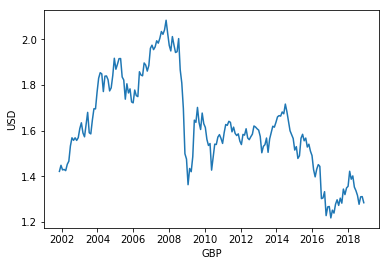

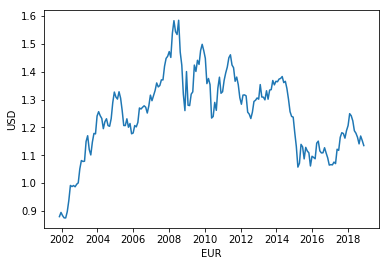

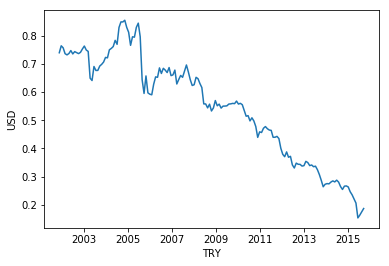

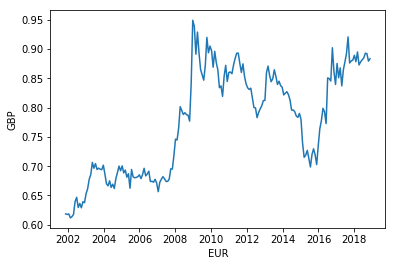

In [221]:
import datetime
from forex_python.converter import get_rate

t = datetime.datetime(2001, 10, 18)  # the 18th of October, 2001

get_rate("USD", "GBP", t)

get_rate("GBP", "USD", t)


t = datetime.datetime(2006, 6, 26)  # June 26th, 2006
get_rate("GBP", "USD", t)

t = datetime.datetime(2001, 10, 18)  # the 18th of October, 2001
GBP_USD_dates = []
GBP_USD_values = []
EUR_USD_dates = []
EUR_USD_values = []
TRY_USD_dates = []
TRY_USD_values = []
EUR_GBP_dates = []
EUR_GBP_values = []
total = 195
for i in range(total):
    t += datetime.timedelta(days=32)
    t.replace(day=1)
    GBP_USD_dates.append(t)
    EUR_USD_dates.append(t)
    EUR_GBP_dates.append(t)
    GBP_USD_values.append(get_rate("GBP", "USD", t))
    EUR_USD_values.append(get_rate("EUR", "USD", t))
    EUR_GBP_values.append(get_rate("EUR", "GBP", t))
    
    try:
        TRY_USD_dates.append(t)
        TRY_USD_values.append(get_rate("TRY", "USD", t))
    except:
        if not i%10:print('{}/{}'.format(i,total))
        continue
        
    if not i%10:print('{}/{}'.format(i,total))
    
import matplotlib.pyplot as plt

df_GBP_USD = pd.concat([pd.DataFrame(GBP_USD_dates),pd.DataFrame(GBP_USD_values)],axis = 1)

fig1 = plt.figure()
ax1 = plt.axes()

ax1.set_xlabel('GBP')
ax1.set_ylabel('USD')

ax1.plot(df_GBP_USD.iloc[:195,0], df_GBP_USD.iloc[:195,1])


df_EUR_USD = pd.concat([pd.DataFrame(EUR_USD_dates),pd.DataFrame(EUR_USD_values)],axis = 1)

fig1 = plt.figure()
ax1 = plt.axes()

ax1.set_xlabel('EUR')
ax1.set_ylabel('USD')

ax1.plot(df_EUR_USD.iloc[:195,0], df_EUR_USD.iloc[:195,1]);

df_TRY_USD = pd.concat([pd.DataFrame(TRY_USD_dates),pd.DataFrame(TRY_USD_values)],axis = 1)

fig1 = plt.figure()
ax1 = plt.axes()

ax1.set_xlabel('TRY')
ax1.set_ylabel('USD')

ax1.plot(df_TRY_USD.iloc[:195,0], df_TRY_USD.iloc[:195,1]);


df_EUR_GBP = pd.concat([pd.DataFrame(EUR_GBP_dates),pd.DataFrame(EUR_GBP_values)],axis = 1)

fig1 = plt.figure()
ax1 = plt.axes()

ax1.set_xlabel('EUR')
ax1.set_ylabel('GBP')

ax1.plot(df_EUR_GBP.iloc[:195,0], df_EUR_GBP.iloc[:195,1]);

    

In [222]:
print(df_GBP_USD.iloc[:,1].var())
print(df_EUR_USD.iloc[:,1].var())
print(df_TRY_USD.iloc[:,1].var())
print(df_EUR_GBP.iloc[:,1].var())

0.04151496312291833
0.020718029783240794
0.03401330513096089
0.008198588004271748


In [223]:
df_GBP_USD_SHIFT = list(df_GBP_USD.iloc[1:,1])
df_GBP_USD_SHIFT.append(df_GBP_USD.iloc[0,1])
df_GBP_USD['Next Month'] = df_GBP_USD_SHIFT
df_GBP_USD['pct change'] = df_GBP_USD.apply(lambda x: (x[2] - x[1])*100/x[1],axis=1)

df_EUR_USD_SHIFT = list(df_EUR_USD.iloc[1:,1])
df_EUR_USD_SHIFT.append(df_EUR_USD.iloc[0,1])
df_EUR_USD['Next Month'] = df_EUR_USD_SHIFT
df_EUR_USD['pct change'] = df_EUR_USD.apply(lambda x: (x[2] - x[1])*100/x[1],axis=1)

df_TRY_USD_SHIFT = list(df_TRY_USD.iloc[1:,1])
df_TRY_USD_SHIFT.append(df_TRY_USD.iloc[0,1])
df_TRY_USD['Next Month'] = df_TRY_USD_SHIFT
df_TRY_USD['pct change'] = df_TRY_USD.apply(lambda x: (x[2] - x[1])*100/x[1],axis=1)

df_EUR_GBP_SHIFT = list(df_EUR_GBP.iloc[1:,1])
df_EUR_GBP_SHIFT.append(df_EUR_GBP.iloc[0,1])
df_EUR_GBP['Next Month'] = df_EUR_GBP_SHIFT
df_EUR_GBP['pct change'] = df_EUR_GBP.apply(lambda x: (x[2] - x[1])*100/x[1],axis=1)

In [224]:
month_number = 0
print('Last {:.2f} years'.format((195-month_number)/12))
print('GBP/USD pct chng std = %s' % (df_GBP_USD.loc[month_number:df_GBP_USD.shape[0]-1,'pct change'].std()))
print('EUR/USD pct chng std = %s' % (df_EUR_USD.loc[month_number:df_EUR_USD.shape[0]-1,'pct change'].std()))
print('TRY/USD pct chng std = %s' % (df_TRY_USD.loc[month_number:df_TRY_USD.shape[0]-1,'pct change'].std()))
print('EUR/GBP pct chng std = %s' % (df_EUR_GBP.loc[month_number:df_EUR_GBP.shape[0]-1,'pct change'].std()))

[print() for i in '.'*2]

month_number = 100
print('Last {:.2f} years'.format((195-month_number)/12))
print('GBP/USD pct chng std = %s' % (df_GBP_USD.loc[month_number:df_GBP_USD.shape[0]-1,'pct change'].std()))
print('EUR/USD pct chng std = %s' % (df_EUR_USD.loc[month_number:df_EUR_USD.shape[0]-1,'pct change'].std()))
print('TRY/USD pct chng std = %s' % (df_TRY_USD.loc[month_number:df_TRY_USD.shape[0]-1,'pct change'].std()))
print('EUR/GBP pct chng std = %s' % (df_EUR_GBP.loc[month_number:df_EUR_GBP.shape[0]-1,'pct change'].std()))



Last 16.25 years
GBP/USD pct chng std = 3.0103879484921148
EUR/USD pct chng std = 3.3200727139335484
TRY/USD pct chng std = 4.480087584466108
EUR/GBP pct chng std = 3.2668562729114092


Last 7.92 years
GBP/USD pct chng std = 2.7152282534856496
EUR/USD pct chng std = 3.3854015914011613
TRY/USD pct chng std = 5.098058110480394
EUR/GBP pct chng std = 3.906938254883437


In [220]:
month_number = 0
print('Last {:.2f} years'.format((195-month_number)/12))
print('GBP/USD pct chng mean = %s' % (abs(df_GBP_USD.loc[month_number:df_GBP_USD.shape[0]-1,'pct change'].mean())))
print('EUR/USD pct chng mean = %s' % (abs(df_EUR_USD.loc[month_number:df_EUR_USD.shape[0]-1,'pct change'].mean())))
print('TRY/USD pct chng mean = %s' % (abs(df_TRY_USD.loc[month_number:df_TRY_USD.shape[0]-1,'pct change'].mean())))

[print() for i in '.'*2]

month_number = 100
print('Last {:.2f} years'.format((195-month_number)/12))
print('GBP/USD pct chng mean = %s' % (abs(df_GBP_USD.loc[month_number:df_GBP_USD.shape[0]-1,'pct change'].mean())))
print('EUR/USD pct chng mean = %s' % (abs(df_EUR_USD.loc[month_number:df_EUR_USD.shape[0]-1,'pct change'].mean())))
print('TRY/USD pct chng mean = %s' % (abs(df_TRY_USD.loc[month_number:df_TRY_USD.shape[0]-1,'pct change'].mean())))

Last 16.25 years
GBP/USD pct chng mean = 0.045366698703774404
EUR/USD pct chng mean = 0.05711569339384969
TRY/USD pct chng mean = 0.7607055417587754


Last 7.92 years
GBP/USD pct chng mean = 0.04721239898961258
EUR/USD pct chng mean = 0.31759735413698803
TRY/USD pct chng mean = 1.5731894345728379


In [391]:
X_train[['OverallQual','LotArea','LotFrontage']].groupby('OverallQual').agg({'LotArea':sum, 'LotFrontage':sum})

,LotArea,LotFrontage
OverallQual,,
1,15020,120.049958
2,8400,60.000000
3,108229,932.099917
4,683616,4843.599500
5,2573940,16889.098251
6,2732307,17811.297252
7,2433864,15340.898418
8,1340306,9273.049126
9,368965,2192.000000


In [400]:
housePriceEDA[['OverallQual','LotArea','LotFrontage','Alley']].groupby('OverallQual').\
agg({'LotArea':lambda x: list(filter(lambda y: not pd.isna(y),x))[0], 'LotFrontage':sum, \
     'Alley':lambda x: list(filter(lambda y: not pd.isna(y),x))[0]})

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [402]:
housePriceEDA.loc[:,'Alley'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Alley, dtype: object

In [426]:
housePriceEDA[['OverallQual','LotArea','LotFrontage','Alley']].groupby('OverallQual').\
agg({'LotArea':lambda x: list(filter(lambda y: not pd.isna(y),x))[0], 'LotFrontage':sum, \
     'Alley':lambda x: list(filter(lambda y: not pd.isna(y),x))[0] \
     if len(list(filter(lambda y: not pd.isna(y),x))) >0 else 'NaN'})

,LotArea,LotFrontage,Alley
OverallQual,,,
1,10020,50.0,NaN
2,6120,161.0,NaN
3,5790,1126.0,Grvl
4,10791,5866.0,Pave
5,14115,22656.0,Grvl
6,9600,18992.0,Pave
7,8450,18680.0,Grvl
8,14260,11065.0,Pave
9,11924,3581.0,NaN


In [413]:
def notna(x):
    return not pd.isna(x)

In [415]:
housePriceEDA[['Alley']]

,Alley
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN
